In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyBigWig
from pyBioInfo.IO.File import GtfFile, GtfGeneBuilder

In [2]:
f_gtf_ncbi = "../../common/ncbi_Sdu_1.0/GCF_002260705.1_Sdu_1.0_genomic.clean.sorted.gtf.gz"
f_gtf_ensembl = "../../common/ensembl_Sdu_1.0/Seriola_dumerili.Sdu_1.0.103.converted.clean.sorted.gtf.gz"
f_gtf_ngs = "../../1_analysis_of_rna_seq/results/assembly/stringtie/merged_all_samples.sorted.gtf.gz"
f_gtf_tgs = "../../2_analysis_of_iso_seq/results/assembly/tama/filtered_internal_primer/all_samples.mp4.sorted.gtf.gz"
f_gtf_asm = "../../3_integrate_isoforms/results/assembly/asm.final.sorted.gtf.gz"

f_fasta = "../../common/ncbi_Sdu_1.0/GCF_002260705.1_Sdu_1.0_genomic.fa"

In [3]:
def load_transcripts(path):
    data = dict()
    with GtfFile(path) as f:
        for gene in GtfGeneBuilder(f):
            for transcript in gene.transcripts:
                data[transcript.name] = transcript
    return data
# transcripts_ncbi = load_transcripts(f_gtf_ncbi)
# transcripts_ensembl = load_transcripts(f_gtf_ensembl)
transcripts_asm = load_transcripts(f_gtf_asm)

## 4 tracks

In [4]:
gene = "slc25a12"

if gene == "fam126a":
    # fam126a
    tids = ["G8624.1", "G8624.5", "G8624.13", "G8624.17"]
    chrom = "NW_019174365.1"
    start = 4167000
    end = 4173000
    strand = "-"
elif gene == "slc25a12":
    # slc25a12
    tids = ["G4519.1", "G4519.5", "G4519.7", "G4519.14"]
    chrom = "NW_019174307.1"
    start = 11665000
    end = 11671000
    strand = "-"
elif gene == "ect2":
    tids = ["G16386.1", "G16386.4", "G16386.5", "G16386.9"]
    chrom = "NW_019174576.1"
    start = 2074000
    end = 2085000
    strand = "+"
elif gene == "marf1":
    tids = ["G14042.13", "G14042.15", "G14042.16", "G14042.20"]
    chrom = "NW_019174485.1"
    start = 538000
    end = 542000
    strand = "-"
else:
    assert False
    
transcripts = [transcripts_asm[tid] for tid in tids]

f_bw_list = [
    "../../1_analysis_of_rna_seq/results/tracks/bw/Ad_Go_Fe_1.norm.%s.bw" % strand,
    "../../1_analysis_of_rna_seq/results/tracks/bw/Ad_Go_Fe_2.norm.%s.bw" % strand,
    "../../1_analysis_of_rna_seq/results/tracks/bw/Ad_Go_Ma_2.norm.%s.bw" % strand,
    "../../1_analysis_of_rna_seq/results/tracks/bw/Ad_Go_Ma_3.norm.%s.bw" % strand,
]
    
array = []
for path in f_bw_list:
    with pyBigWig.open(path) as bw:
        values = bw.values(chrom, start, end)
        values = np.nan_to_num(values, 0)
        array.append(values)  

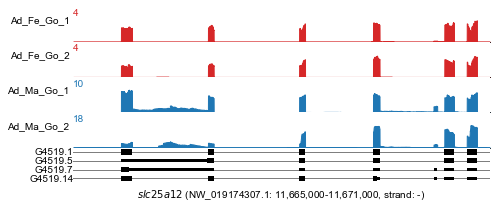

In [5]:
xs = np.arange(start, end)

fig, axs = plt.subplots(5, 1, figsize=(7, 3), sharex=True, gridspec_kw={"hspace": 0})

for i in range(5):
    ax = axs[i]
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    if i == 4:
        ax.spines["bottom"].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
labels = ["Ad_Fe_Go_1", "Ad_Fe_Go_2", "Ad_Ma_Go_1", "Ad_Ma_Go_2"]
for i in range(len(array)):
    ax = axs[i]
    plt.sca(ax)
    ys = array[i]
    color = "C3" if i < 2 else "C0"
    plt.fill_between(xs, ys, color=color)
    h = int(max(ys) * 1.5) + 1
    plt.ylim(0, h)
    # plt.text(start, 0, "0", va="bottom")
    plt.text(start, h * 0.95, "%s" % format(h, ","), va="top", color=color)
    plt.ylabel(labels[i], rotation=0, ha="right")
    plt.tight_layout()
    
plt.sca(axs[4])
plt.xlabel("$\it{%s}$ (%s: %s-%s, strand: %s)" % (gene, chrom, format(start, ","), format(end, ","), strand))
labels = tids
for i in range(len(transcripts)):
    transcript = transcripts[i]
    blocks = transcript.blocks
    if len(blocks) > 1:
        plt.plot([blocks[0][1], blocks[-1][0]], [i + 0.5, i + 0.5], ls="-", lw=0.5, color="black")
    for block_start, block_end in transcript.blocks:
        position = (block_start + block_end) / 2
        width = block_end - block_start
        plt.bar(position, 0.3, width=width, bottom=i + 0.35, color="black")
    if transcript.thick:
        thick_start, thick_end = transcript.thick
        for block_start, block_end in transcript.blocks:
            block_start = max(block_start, thick_start)
            block_end = min(block_end, thick_end)
            if block_start >= block_end:
                continue
            position = (block_start + block_end) / 2
            width = block_end - block_start
            plt.bar(position, 0.6, width=width, bottom=i + 0.2, color="black")
    plt.xlim(start, end)
    plt.text(start, i + 0.5, labels[i], ha="right", va="center")
plt.ylim(len(transcripts), 0)

plt.tight_layout()
plt.savefig("figures/track.%s.pdf" % gene, dpi=300)

## 6 tracks

In [8]:
gene = "marf1"

if gene == "fam126a":
    # fam126a
    tids = ["G8624.1", "G8624.5", "G8624.13", "G8624.17"]
    chrom = "NW_019174365.1"
    start = 4167000
    end = 4173000
    strand = "-"
elif gene == "slc25a12":
    # slc25a12
    tids = ["G4519.1", "G4519.5", "G4519.7", "G4519.14"]
    chrom = "NW_019174307.1"
    start = 11665000
    end = 11671000
    strand = "-"
elif gene == "ect2":
    tids = ["G16386.1", "G16386.4", "G16386.5", "G16386.9"]
    chrom = "NW_019174576.1"
    start = 2074000
    end = 2085000
    strand = "+"
elif gene == "marf1":
    tids = ["G14042.13", "G14042.15", "G14042.16", "G14042.20"]
    chrom = "NW_019174485.1"
    start = 538000
    end = 542000
    strand = "-"
else:
    assert False
    
transcripts = [transcripts_asm[tid] for tid in tids]

f_bw_list = [
    "../../1_analysis_of_rna_seq/results/tracks/bw/Ju_Go_Mi_1.norm.%s.bw" % strand,
    "../../1_analysis_of_rna_seq/results/tracks/bw/Ju_Go_Mi_2.norm.%s.bw" % strand,
    "../../1_analysis_of_rna_seq/results/tracks/bw/Ad_Go_Fe_1.norm.%s.bw" % strand,
    "../../1_analysis_of_rna_seq/results/tracks/bw/Ad_Go_Fe_2.norm.%s.bw" % strand,
    "../../1_analysis_of_rna_seq/results/tracks/bw/Ad_Go_Ma_2.norm.%s.bw" % strand,
    "../../1_analysis_of_rna_seq/results/tracks/bw/Ad_Go_Ma_3.norm.%s.bw" % strand,
]
    
array = []
for path in f_bw_list:
    with pyBigWig.open(path) as bw:
        values = bw.values(chrom, start, end)
        values = np.nan_to_num(values, 0)
        array.append(values)  

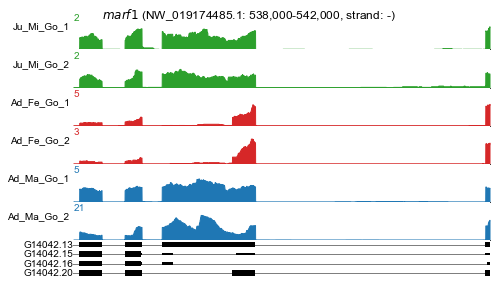

In [9]:
xs = np.arange(start, end)

fig, axs = plt.subplots(7, 1, figsize=(7, 4), sharex=True, gridspec_kw={"hspace": 0})

plt.suptitle("$\it{%s}$ (%s: %s-%s, strand: %s)" % (gene, chrom, format(start, ","), format(end, ","), strand))

for i in range(7):
    ax = axs[i]
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    if i == 6:
        ax.spines["bottom"].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
labels = ["Ju_Mi_Go_1", "Ju_Mi_Go_2", "Ad_Fe_Go_1", "Ad_Fe_Go_2", "Ad_Ma_Go_1", "Ad_Ma_Go_2"]
for i in range(len(array)):
    ax = axs[i]
    plt.sca(ax)
    ys = array[i]
    if 0 <= i < 2:
        color = "C2"
    elif 2 <= i < 4:
        color = "C3"
    else:
        color = "C0"
    plt.fill_between(xs, ys, color=color)
    h = int(max(ys) * 1.5) + 1
    plt.ylim(0, h)
    # plt.text(start, 0, "0", va="bottom")
    plt.text(start, h * 0.95, "%s" % format(h, ","), va="top", color=color)
    plt.ylabel(labels[i], rotation=0, ha="right")
    plt.tight_layout()
    
plt.sca(axs[6])
# plt.xlabel("$\it{%s}$ (%s: %s-%s, strand: %s)" % (gene, chrom, format(start, ","), format(end, ","), strand))
labels = tids
for i in range(len(transcripts)):
    transcript = transcripts[i]
    blocks = transcript.blocks
    if len(blocks) > 1:
        plt.plot([blocks[0][1], blocks[-1][0]], [i + 0.5, i + 0.5], ls="-", lw=0.5, color="black")
    for block_start, block_end in transcript.blocks:
        position = (block_start + block_end) / 2
        width = block_end - block_start
        plt.bar(position, 0.3, width=width, bottom=i + 0.35, color="black")
    if transcript.thick:
        thick_start, thick_end = transcript.thick
        for block_start, block_end in transcript.blocks:
            block_start = max(block_start, thick_start)
            block_end = min(block_end, thick_end)
            if block_start >= block_end:
                continue
            position = (block_start + block_end) / 2
            width = block_end - block_start
            plt.bar(position, 0.6, width=width, bottom=i + 0.2, color="black")
    plt.xlim(start, end)
    plt.text(start, i + 0.5, labels[i], ha="right", va="center")
plt.ylim(len(transcripts), 0)

plt.tight_layout()
plt.savefig("figures/track.%s.pdf" % gene, dpi=300)